<a href="https://colab.research.google.com/github/BrendenLatham/Data_Viz/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 1
# Brenden Latham
# CPSMA 4313

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from google.colab import auth

## 1

For number one I will be looking at a table from the wikipedia page on mountains

### a

Here I will gather the table from the designated wikipedia page

In [3]:
mountains = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
mountains = mountains.text
MountSoup = BeautifulSoup(mountains, 'lxml')
#print(MountSoup)  # for debug
MountTable = MountSoup.find_all('table', class_='wikitable sortable')
#print(MountTable)  # for debug
MountTable[0].find_all('a')
MountFrame = pd.read_html(str(MountTable))[0]
MountFrame

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


### b

Now to see which mountains are in the Himalayas

In [4]:
MountFrame.loc[MountFrame['Range']=='Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


### c

Now a bar chart

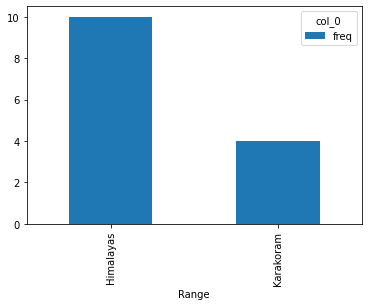

In [5]:
pd.crosstab(MountFrame['Range'], columns = 'freq').plot(kind='bar')

### d

Now a different package for a boxplot

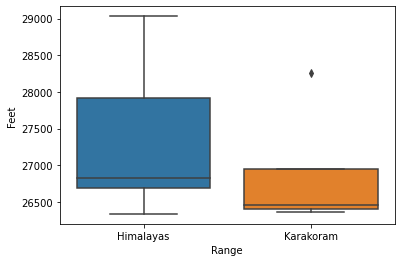

In [6]:
sns.boxplot(data=MountFrame['Feet'],x=MountFrame['Range'],y=MountFrame['Feet'])

### e

Now for the mean, standard deviation, and five number summary

In [7]:
quartiles = np.percentile(MountFrame['Feet'],[25,50,75])
MinMax = MountFrame['Feet'].min(), MountFrame['Feet'].max()
print("mean: ",MountFrame['Feet'].mean())
print("standard deviation: ",np.std(MountFrame['Feet']))
print("min",MinMax[0])
print("Q1",quartiles[0])
print("median",quartiles[1])
print("Q3",quartiles[2])
print("max",MinMax[1])

mean:  27178.214285714286
standard deviation:  847.9655635335527
min 26335
Q1 26518.0
median 26788.0
Q3 27914.5
max 29032


### f

Now I will look at the mean and median of mountains by range

In [8]:
MountFrame.groupby(by='Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.80  8177.5  27295.9  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

## 2

For number two I will be using BigQuery public dataset ‘chicago taxi trips.taxi trips’

In [9]:
auth.authenticate_user()
print('authenticated')

authenticated


In [19]:
%%bigquery --project data-viz-338801

SELECT *
FROM bigquery-public-data.chicago_taxi_trips.taxi_trips
LIMIT 1

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None


### a

First I will look at how many rows there are in the dataset

In [17]:
%%bigquery --project data-viz-338801

SELECT COUNT(*) as length
FROM bigquery-public-data.chicago_taxi_trips.taxi_trips

,length
0,198792903


### b

Now for the total of the trip based on payment type

In [25]:
%%bigquery --project data-viz-338801

with t as (
  SELECT trip_total as Total, payment_type as PaymentType
  FROM bigquery-public-data.chicago_taxi_trips.taxi_trips
)
SELECT AVG(Total) as AveTotal, PaymentType
FROM t
GROUP BY PaymentType

,AveTotal,PaymentType
0,10.116931,Pcard
1,15.496588,Dispute
2,20.339910,Mobile
3,17.649893,Unknown
4,16.639366,Way2ride
5,18.788039,Split
6,22.377662,Prepaid
7,20.524892,Credit Card
8,20.320682,Prcard
9,12.265548,Cash


### c

Lastly I will get the number of non-zero trips that had above average time. I will take the question as "only considering non-zero trips, how many were above average"

In [40]:
%%bigquery --project data-viz-338801

with t as (
  SELECT trip_seconds as DurationSec, unique_key as Key
  FROM bigquery-public-data.chicago_taxi_trips.taxi_trips
  WHERE trip_seconds != 0
)
SELECT AVG(DurationSec) as AveSec
FROM t

,AveSec
0,837.160891


In [41]:
%%bigquery --project data-viz-338801

with t as (
  SELECT trip_seconds as DurationSec, unique_key as Key
  FROM bigquery-public-data.chicago_taxi_trips.taxi_trips
  WHERE trip_seconds != 0
)
SELECT COUNT(*)
FROM t
WHERE DurationSec > 837.160891

,f0_
0,60750508


## 3

### a

Roughly 1.5 hours

### b

The hardest was scraping from twitter using the API, while the easiest was SQL

### c

I am most excited to use web scraping again

## Sources

https://www.kaggle.com/hamelg/python-for-data-19-frequency-tables \\
https://numpy.org/doc/stable/reference/generated/numpy.std.html \\
https://bramtunggala.medium.com/5-number-summary-with-python-8aad81863b73 \\
https://github.com/BrendenLatham